## Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
df = load_iris()

In [3]:
print(df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
x = df.data
y = df.target

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score     
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [9]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [10]:
pred_i == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
scores = accuracy_score(y_test,pred_i)*100
print(scores)
# Accuracy of Classification with KNN is 96.6%

96.66666666666667


In [12]:
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, pred_i)  
cm1

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]], dtype=int64)

Text(0, 0.5, 'Mean Error')

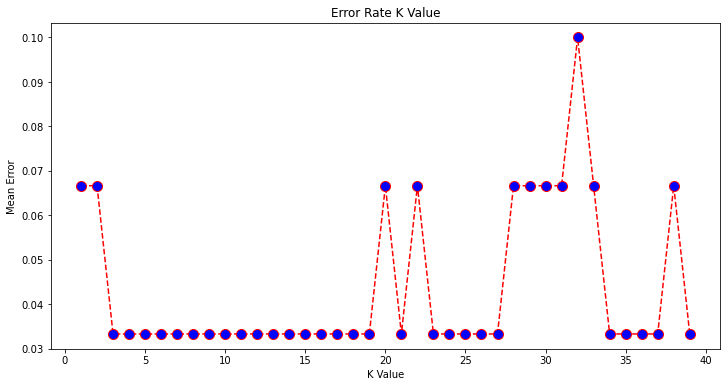

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Error rate is low between 3 to 19, so we can use K value between these.

### Using Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predictions = logisticReg.predict(x_test)

In [16]:
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [17]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [18]:
score = accuracy_score(y_test,predictions)*100
score

96.66666666666667

### Both Logistic Regression and KNN gave us 96.6% accuracy.